In [42]:
import xarray as xr # This is the only package that needs to be imported

## Reading a netcdf file into an Xarray Dataset ##

1. In this case I make another directory in this directory called "data" and put the netcdf files in it. 
2. Once you find the file, you can open it as a data set with the xr.open_dataset command. This is the great thing about netcdf files, they are "self-describing" and prersumably have all the metadata they need to be opened and accessed anywhere,
3. Reduce the dimensions of the data (ie drop the lat/lon/depth data) to make it 2-dimentional
4. Convert the data to a pandas Dataframe
5. Write to text file (csv or whatever).


In [43]:
fname = "./data/m1_ocr_Ed10_std.nc"
ds = xr.open_dataset(fname)
ds # View the dataset if using a jupyter notebook

<xarray.Dataset>
Dimensions:                           (depth: 1, latitude: 1, longitude: 1, time: 20023, wavelength: 134)
Coordinates:
  * time                              (time) datetime64[ns] 2017-08-08T00:12:...
  * latitude                          (latitude) float64 36.76
  * longitude                         (longitude) float64 -122.0
  * depth                             (depth) float64 8.9
  * wavelength                        (wavelength) float64 353.3 356.7 ... 796.7
Data variables:
    ocean_downwelling_irradiance_10m  (time, depth, latitude, longitude, wavelength) float32 ...
    sample_count                      (time) int16 ...
Attributes:
    waterdepth:        meters
    waterdepth_units:  meters
    creationdate:      07/24/2021
    mooring:           m1
    latitude:          -122.03403
    depth:             8.9
    lastmodified:      07/24/2021

__The downwelling data has some extra dimensions: latitude, longitude, depth, which are all fixed, so we want to flattened them.__

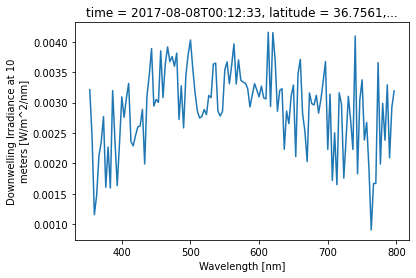

In [44]:
ds_short = ds.isel(latitude=0,longitude=0,depth=0) # This just squeezes the data from (n, 1, 1, 1, m) to (n, m)
ds_short['ocean_downwelling_irradiance_10m'].isel(time=0).plot() # plot the first time

__Convert the data from a dataset to a pandas dataframe (better for 2-dimensional data)__

In [45]:
df = ds_short['ocean_downwelling_irradiance_10m'].to_pandas()
df.head()

wavelength,353.333333,356.666667,360.000000,363.333333,366.666667,370.000000,373.333333,376.666667,380.000000,383.333333,...,766.666667,770.000000,773.333333,776.666667,780.000000,783.333333,786.666667,790.000000,793.333333,796.666667
time,,,,,,,,,,,,,,,,,,,,,
2017-08-08 00:12:33,0.003211,0.002435,0.001156,0.001472,0.002120,0.002347,0.002770,0.001606,0.002268,0.001594,...,0.001669,0.001670,0.003656,0.001989,0.002987,0.002380,0.003290,0.002091,0.002921,0.003192
2017-08-08 00:52:35,0.001605,0.001450,0.001841,0.002034,0.002914,0.003319,0.002221,0.002056,0.001014,0.001725,...,0.001665,0.001720,0.001354,0.001035,0.000913,0.001880,0.002142,0.001033,0.002119,0.001682
2017-08-08 01:12:33,0.000240,0.000169,0.000176,0.000268,0.000240,0.000146,0.000166,0.000158,0.000146,0.000212,...,0.000094,0.000114,0.000123,0.000086,0.000163,0.000136,0.000216,0.000197,0.000164,0.000248
2017-08-08 01:32:33,0.000190,0.000156,0.000276,0.000300,0.000311,0.000339,0.000240,0.000230,0.000200,0.000215,...,0.000157,0.000128,0.000072,0.000062,0.000112,0.000149,0.000235,0.000167,0.000127,0.000223
2017-08-08 01:52:34,0.000156,0.000167,0.000141,0.000152,0.000086,0.000178,0.000196,0.000261,0.000196,0.000240,...,0.000118,0.000262,0.000329,0.000219,0.000294,0.000147,0.000184,0.000118,0.000183,0.000181


__Finally write the pandas dataframe out to a csv__

In [46]:
df.to_csv("./data/m1_downwelling_std.csv")